# PROJECT BRIGHT HOPE


BANA-6043 Group Project \
Group 2-14 
- Kelly Cordetti
- Sweta Pandya
- Yash Shukla


In [115]:
# Import Libraries

In [116]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bs4
import sklearn
from scipy.stats import zscore
import warnings

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


from sklearn import set_config
set_config(display='diagram')
warnings.filterwarnings("ignore")

In [117]:
Mood = pd.read_csv('MoodDisorders.csv', low_memory=False)

In [118]:
Mood = Mood.dropna()
Mood

,PersonNum,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,Person-1,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Person-2,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Person-3,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Person-4,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Person-5,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Person-236,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
236,Person-237,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
237,Person-238,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
238,Person-239,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


## Exploratory Data Analysis

### Check Data Dimension

In [119]:
Mood.shape

(240, 19)

### Check Duplicates

In [120]:
Mood.duplicated().sum()

0

### Check Data Types

In [121]:
Mood.dtypes

PersonNum           object
Sadness             object
Euphoria            object
Exhaustion          object
Sleeplessness       object
MoodSwing           object
SuicidalThoughts    object
Anorxia             object
Disobedience        object
JustifyBehavior     object
Aggressiveness      object
MoveOn              object
NervousBreakdown    object
AdmitMistakes       object
Overthinking        object
SexualActivity      object
Concentration       object
Optimisim           object
Diagnosis           object
dtype: object

### Check Summary Statistics

In [122]:
Mood.describe()

,PersonNum,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
count,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
unique,240,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Person-1,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,84,92,76,88,126,126,148,146,126,124,140,124,122,130,44,66,42,62


#### Total number of rows: 240
#### Total number of columns: 19

### Find unique value and count the Categorical Data ( Sadness,Euphoria,Exhaustion,Sleeplessness)

In [123]:
sadness_counts = Mood['Sadness'].value_counts()

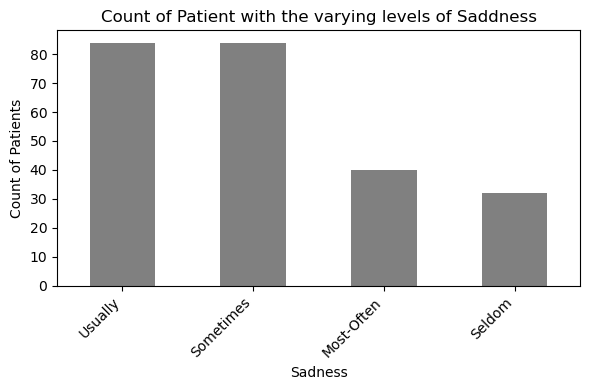

In [124]:
plt.figure(figsize=(6, 4))
sadness_counts.plot(kind='bar', color='Gray')
plt.title('Count of Patient with the varying levels of Saddness')
plt.xlabel('Sadness')
plt.ylabel('Count of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The above graph shows that around 25% of the total sample are usualy sad and around 25% of the patients are sometimes sad

In [125]:
Euphoria_counts = Mood['Euphoria'].value_counts()

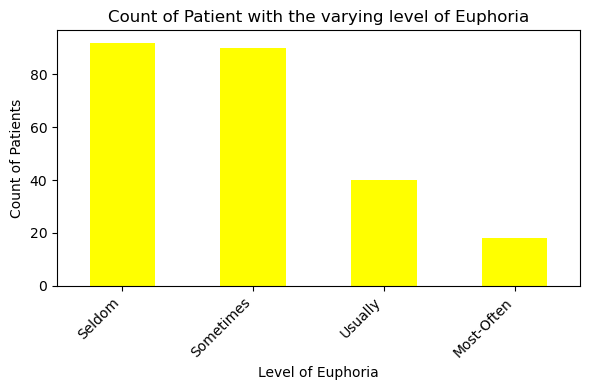

In [126]:
plt.figure(figsize=(6, 4))
Euphoria_counts.plot(kind='bar', color='Yellow')
plt.title('Count of Patient with the varying level of Euphoria')
plt.xlabel('Level of Euphoria')
plt.ylabel('Count of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The graph above suggests that more than half of the people experience euphoria only infrequently.

In [127]:
Exhaustion_counts = Mood['Exhaustion'].value_counts()

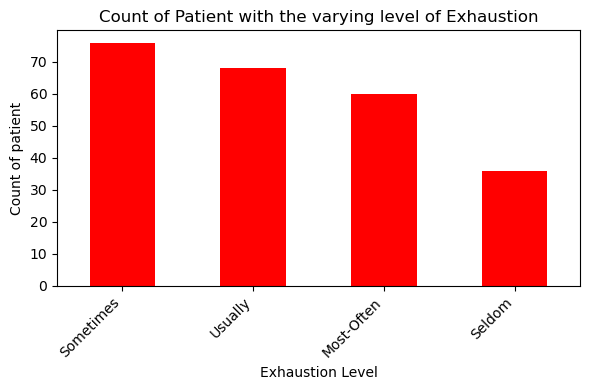

In [128]:
plt.figure(figsize=(6, 4))
Exhaustion_counts.plot(kind='bar', color='red')
plt.title('Count of Patient with the varying level of Exhaustion')
plt.xlabel('Exhaustion Level')
plt.ylabel('Count of patient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The graph above indicates that approximately one fourth of the patients usually feel exhausted

In [129]:
Sleeplessness_counts = Mood['Sleeplessness'].value_counts()

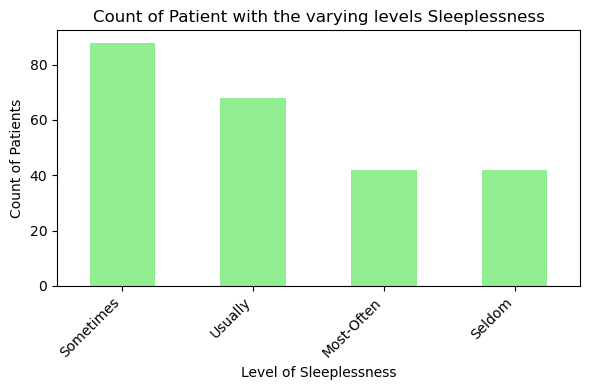

In [130]:
plt.figure(figsize=(6, 4))
Sleeplessness_counts.plot(kind='bar', color='lightgreen')
plt.title('Count of Patient with the varying levels Sleeplessness')
plt.xlabel('Level of Sleeplessness')
plt.ylabel('Count of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The graph above indicates that approximately one fourth of the patients are usually sleepy

In [131]:
diagnosis_counts = Mood['Diagnosis'].value_counts()

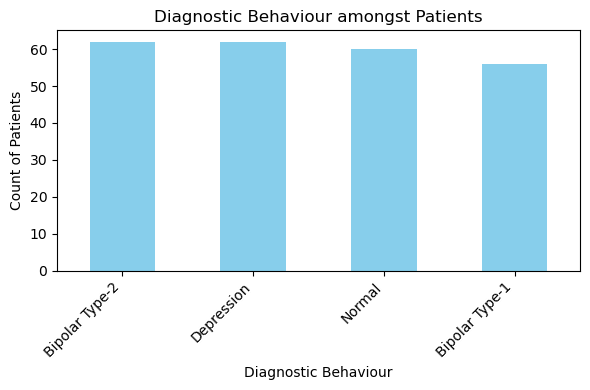

In [132]:
plt.figure(figsize=(6, 4))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Diagnostic Behaviour amongst Patients')
plt.xlabel('Diagnostic Behaviour')
plt.ylabel('Count of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Approximately 25% of the people in the sample data  suffer from Bipolar Type 2 disorder and 25 % of the people suffer from depression. Around 22% of the people suffer from Bipolar Type -1. The remaining percentage of the people are diagonosed as Normal

 ### Finding the average of numeric Data

In [133]:
Mood_num_factors = Mood.copy()
# Convert columns to numeric where applicable
numeric_columns = ['SexualActivity', 'Concentration', 'Optimisim']
for col in numeric_columns:
    try:
        Mood_num_factors[col] = Mood_num_factors[col].str.extract('(\d+)').astype(float)
    except AttributeError:
        print("")

# Calculate the average of numerical columns
average_values = Mood_num_factors[numeric_columns].mean()
average_values
print("Average of each numerical column:")
print(average_values)


Average of each numerical column:
SexualActivity    4.741667
Concentration     4.250000
Optimisim         4.466667
dtype: float64


#### The Sexual activity of the people in the sample data is 4.75
#### The concentration level of the people in the sample data is 4.25
#### The optimism level of the people in the sample data is 4.6
#### Overall sexual activity, level of concentration and optimism is low 



### Finding the percentage of patients by diagnostic behaviour for each Symptom

#### Cleaning and coverting the data to numeric type

In [134]:
Columns_to_copy = ['SuicidalThoughts','Anorxia','Disobedience', 'JustifyBehavior','Aggressiveness', 'MoveOn', 'NervousBreakdown', 'AdmitMistakes', 'Overthinking','Diagnosis' ]  
Mood_subset = Mood[Columns_to_copy].copy()


In [135]:
Mood_subset.head()


,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,Diagnosis
0,YES,NO,NO,YES,NO,NO,YES,YES,YES,Bipolar Type-2
1,YES,NO,NO,NO,NO,NO,NO,NO,NO,Depression
2,NO,NO,NO,YES,YES,NO,YES,YES,NO,Bipolar Type-1
3,YES,YES,NO,YES,NO,NO,NO,NO,NO,Bipolar Type-2
4,NO,NO,NO,NO,NO,NO,YES,YES,YES,Normal


In [136]:
Mood_subset['SuicidalThoughts'].unique()

array(['YES ', 'YES', 'NO'], dtype=object)

In [137]:
Mood_subset[Mood_subset['SuicidalThoughts'] == 'YES ']

,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,Diagnosis
0,YES,NO,NO,YES,NO,NO,YES,YES,YES,Bipolar Type-2
120,YES,NO,NO,YES,NO,NO,YES,YES,YES,Bipolar Type-2


In [138]:
Mood_subset['SuicidalThoughts'] =Mood_subset['SuicidalThoughts'].replace('YES ', 'YES')


In [139]:
Mood_subset['SuicidalThoughts'].unique()

array(['YES', 'NO'], dtype=object)

In [140]:
#Converting String to integer values

In [141]:
mapping = {'YES': 1, 'NO': 0}

# Apply the mapping to specific columns using the replace method
columns_to_convert = ['SuicidalThoughts','Anorxia','Disobedience', 'JustifyBehavior','Aggressiveness', 'MoveOn', 'NervousBreakdown', 'AdmitMistakes', 'Overthinking']
Mood_subset[columns_to_convert] = Mood_subset[columns_to_convert].replace(mapping)
Mood_subset.head()

,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,Diagnosis
0,1,0,0,1,0,0,1,1,1,Bipolar Type-2
1,1,0,0,0,0,0,0,0,0,Depression
2,0,0,0,1,1,0,1,1,0,Bipolar Type-1
3,1,1,0,1,0,0,0,0,0,Bipolar Type-2
4,0,0,0,0,0,0,1,1,1,Normal


In [142]:
yes_rows = Mood_subset[Mood_subset['SuicidalThoughts'] == 'YES ']
yes_rows

,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,Diagnosis


In [143]:
#Converting String to integer values

In [144]:
mapping = {'YES': 1, 'NO': 0}

# Apply the mapping to specific columns using the replace method
columns_to_convert = ['SuicidalThoughts','Anorxia','Disobedience', 'JustifyBehavior','Aggressiveness', 'MoveOn', 'NervousBreakdown', 'AdmitMistakes', 'Overthinking']
Mood_subset[columns_to_convert] = Mood_subset[columns_to_convert].replace(mapping)

In [145]:
Mood_subset.head()

,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,Diagnosis
0,1,0,0,1,0,0,1,1,1,Bipolar Type-2
1,1,0,0,0,0,0,0,0,0,Depression
2,0,0,0,1,1,0,1,1,0,Bipolar Type-1
3,1,1,0,1,0,0,0,0,0,Bipolar Type-2
4,0,0,0,0,0,0,1,1,1,Normal


In [146]:
grouped = Mood_subset.groupby('Diagnosis').mean()

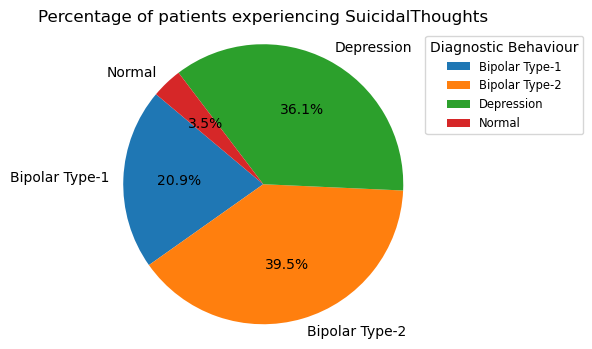

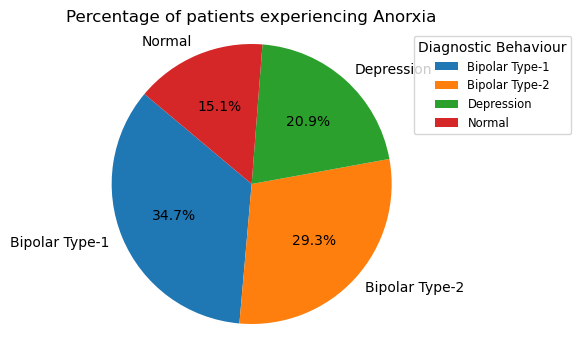

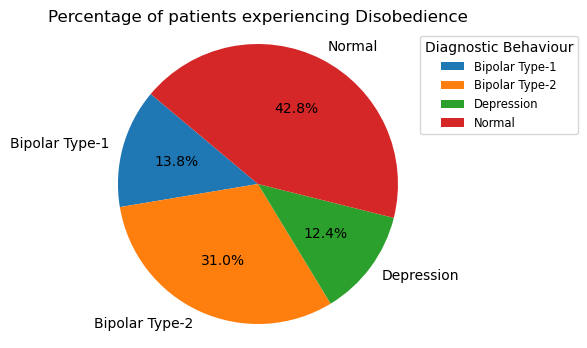

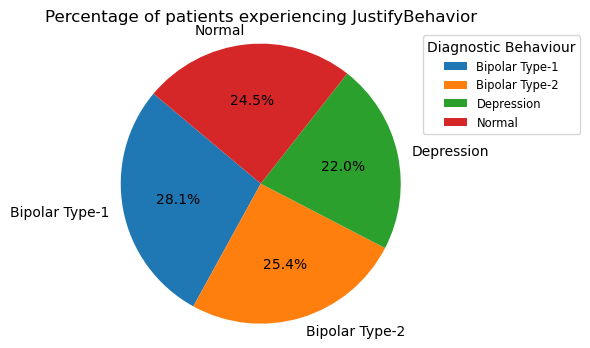

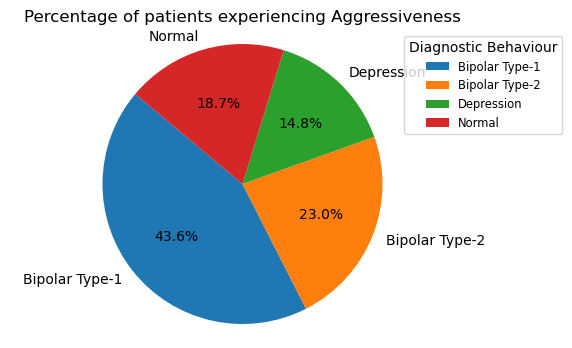

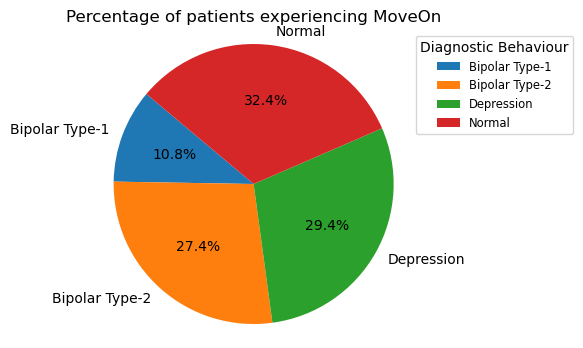

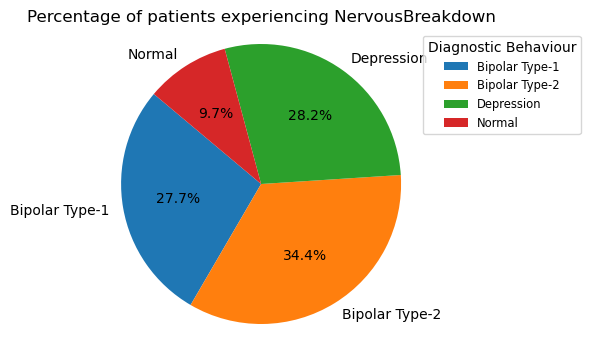

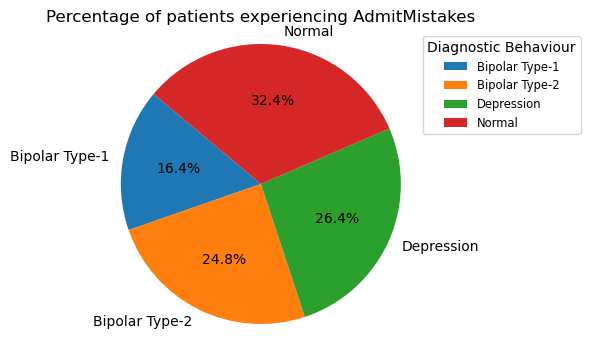

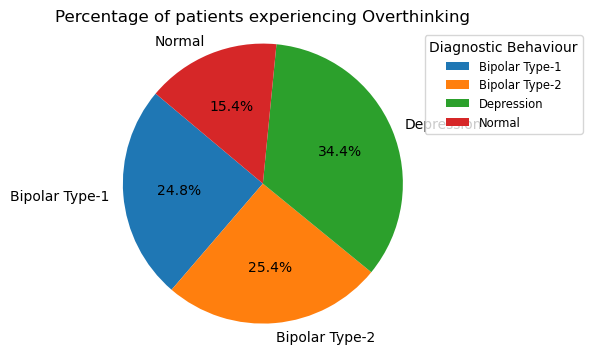

In [147]:
for column in grouped.columns:
    plt.figure(figsize=(6, 4))
    plt.pie(grouped[column], labels=grouped.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage of patients experiencing {column}')
    plt.legend(title='Diagnostic Behaviour' ,fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

#### From the above we can infer that <br> i) Suicidal thoughts are high in people suffering from Depression and bipolar Type-2. <br> ii) Bipolar Type-1 and Bipolar Type -2 tend to be more anorexic <br>iii) People who are diagnosed as normal are more disobedient that people suffering from some disorder <br>iv) In general people try to justify their behaviour <br>v) Peopole suffering from bipolar Type-1 disorder are more aggresive and find it moere difficult to move on from things  as compared to others <br>vi) Patients with Bipolar Type-2 disorder have more nervous breakdowns <br>vii) People with no disorders tend to accept their mistakes <br>vii) Overthing is more common in Pateints suffering from Depression and Bipolat type-2 as compared to other groups


#### Distribution Analysis 

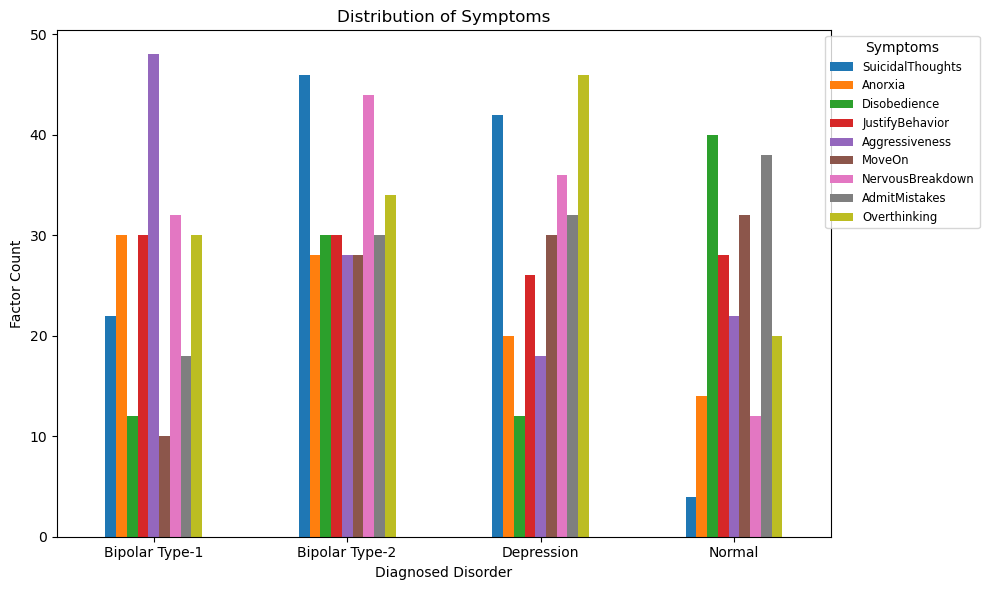

In [148]:
diagnosis_sum = Mood_subset.groupby('Diagnosis').sum()

# Plottingt
diagnosis_sum.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Symptoms')
plt.xlabel('Diagnosed Disorder')
plt.ylabel('Factor Count')
plt.xticks(rotation=0)
plt.legend(title='Symptoms' ,fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

### Create Correlation Plot

In [149]:
Mood_corr = Mood.drop(columns=['PersonNum'])

In [150]:
Mood_corr.head()

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [151]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over columns in your DataFrame
for column in Mood_corr.columns:
    # Check if the column contains object (string) data type
    if Mood_corr[column].dtype == 'object':
        # Apply LabelEncoder to encode string values
        Mood_corr[column] = label_encoder.fit_transform(Mood_corr[column])

In [152]:
correlation_matrix = Mood_corr.corr()

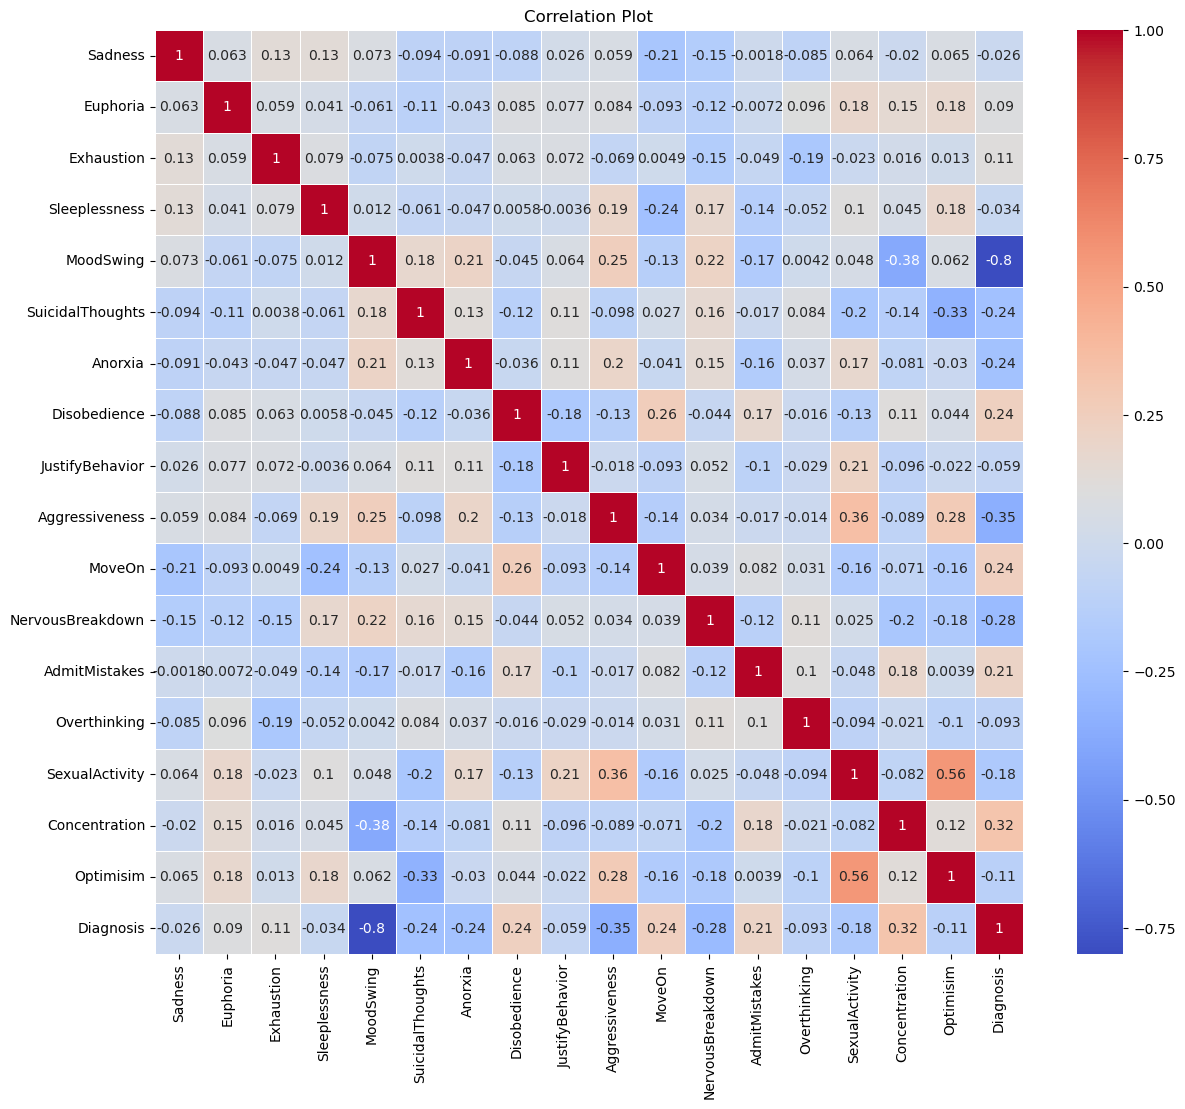

In [153]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

#### From the correlation plot we can see there is a strong positive correlation between Sexual activity and Optimism <br> There is also some positive correlation between Aggrisive and sexual aticvity.<br> The level of optimism is also midly correlates Aggresiveness.<br> Suicidal thought is negatively correlated to the level of optimism. <br>Mood Swings is negatively correlated to Concentration


## Data Wrangling

### Check for missing values

In [157]:
Mood_temp3 = Mood_num_factors.drop(columns = ['PersonNum'])
Mood_temp3

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3.0,3.0,4.0,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4.0,2.0,5.0,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6.0,5.0,7.0,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3.0,2.0,2.0,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5.0,5.0,6.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2.0,5.0,3.0,Depression
236,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6.0,7.0,8.0,Bipolar Type-1
237,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1.0,5.0,3.0,Bipolar Type-2
238,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7.0,7.0,7.0,Depression


In [158]:
label_encoder = LabelEncoder()

# Iterate over columns in your DataFrame
for column in Mood_temp3.columns:
    # Check if the column contains object (string) data type
    if Mood_temp3[column].dtype == 'object':
        # Apply LabelEncoder to encode string values
        Mood_temp3[column] = label_encoder.fit_transform(Mood_temp3[column])

In [160]:
 Mood_clean = Mood_temp3
 Mood_clean

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim,Diagnosis
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,3.0,3.0,4.0,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4.0,2.0,5.0,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6.0,5.0,7.0,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3.0,2.0,2.0,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5.0,5.0,6.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2.0,5.0,3.0,2
236,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6.0,7.0,8.0,0
237,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1.0,5.0,3.0,1
238,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7.0,7.0,7.0,2


In [161]:
missing_values = Mood_clean.isnull().sum()
print(missing_values)

Sadness             0
Euphoria            0
Exhaustion          0
Sleeplessness       0
MoodSwing           0
SuicidalThoughts    0
Anorxia             0
Disobedience        0
JustifyBehavior     0
Aggressiveness      0
MoveOn              0
NervousBreakdown    0
AdmitMistakes       0
Overthinking        0
SexualActivity      0
Concentration       0
Optimisim           0
Diagnosis           0
dtype: int64


In [163]:
target = Mood_clean['Diagnosis']
features = Mood_clean.drop(['Diagnosis'], axis=1)

features.dtypes

Sadness               int32
Euphoria              int32
Exhaustion            int32
Sleeplessness         int32
MoodSwing             int32
SuicidalThoughts      int32
Anorxia               int32
Disobedience          int32
JustifyBehavior       int32
Aggressiveness        int32
MoveOn                int32
NervousBreakdown      int32
AdmitMistakes         int32
Overthinking          int32
SexualActivity      float64
Concentration       float64
Optimisim           float64
dtype: object

In [164]:
features

,Sadness,Euphoria,Exhaustion,Sleeplessness,MoodSwing,SuicidalThoughts,Anorxia,Disobedience,JustifyBehavior,Aggressiveness,MoveOn,NervousBreakdown,AdmitMistakes,Overthinking,SexualActivity,Concentration,Optimisim
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,3.0,3.0,4.0
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4.0,2.0,5.0
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6.0,5.0,7.0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3.0,2.0,2.0
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2.0,5.0,3.0
236,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6.0,7.0,8.0
237,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1.0,5.0,3.0
238,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7.0,7.0,7.0


In [165]:
target

0      1
1      2
2      0
3      1
4      3
      ..
235    2
236    0
237    1
238    2
239    3
Name: Diagnosis, Length: 240, dtype: int32

### Pre-processing

In [166]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(features)
categorical_columns = categorical_columns_selector(features)

categorical_columns

[]

In [167]:
numerical_columns

['Sadness',
 'Euphoria',
 'Exhaustion',
 'Sleeplessness',
 'MoodSwing',
 'SuicidalThoughts',
 'Anorxia',
 'Disobedience',
 'JustifyBehavior',
 'Aggressiveness',
 'MoveOn',
 'NervousBreakdown',
 'AdmitMistakes',
 'Overthinking',
 'SexualActivity',
 'Concentration',
 'Optimisim']

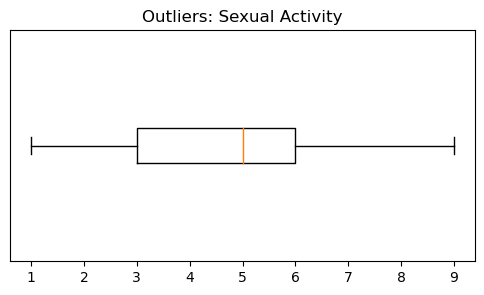

In [168]:
#Box plot of numerical outliers


fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot('SexualActivity', data=Mood_num_factors[numeric_columns], vert=False)

ax.set_title('Outliers: Sexual Activity')
ax.set_yticklabels('')
ax.set_yticks([]);

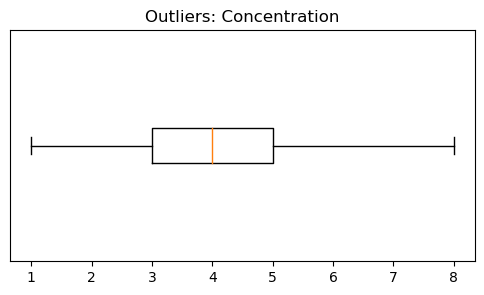

In [169]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot('Concentration', data=Mood_num_factors[numeric_columns], vert=False)

ax.set_title('Outliers: Concentration')
ax.set_yticklabels('')
ax.set_yticks([]);

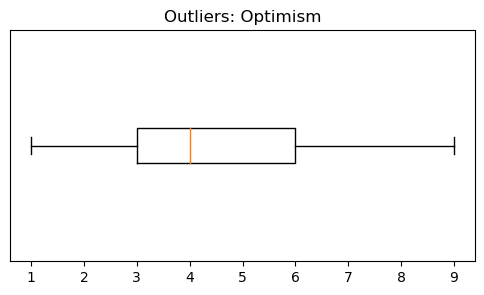

In [170]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot('Optimisim', data=Mood_num_factors[numeric_columns], vert=False)

ax.set_title('Outliers: Optimism')
ax.set_yticklabels('')
ax.set_yticks([]);

### Building Functions For Models

In [171]:
def evaluate_model(model, X_test, y_test, average='weighted'):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)
    f1 = f1_score(y_test, y_pred, average=average)
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    print(f'Accuracy: {acc*100:.2f}%')
    print(f'Precision: {precision*100:.2f}%')
    print(f'Recall: {recall*100:.2f}%')
    print(f'F1-score: {f1*100:.2f}%')
    print(f"{type(model).__name__} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    plt.savefig('BANA6043.png')


## Model Building

Splitting data into train and test

In [172]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = .2, random_state=123)

In [173]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Randon Forest Model

In [174]:
rfm = RandomForestClassifier(random_state=32)
rfm.fit(X_train, y_train)
rfm

RandomForestClassifier(random_state=32)

### Decision Tree Model

In [175]:
dtm = DecisionTreeClassifier(random_state=142)
dtm.fit(X_train, y_train)
dtm

DecisionTreeClassifier(random_state=142)

## Model Evaluation

### Random Forest Evaluation

Accuracy: 91.67%
Precision: 93.06%
Recall: 91.67%
F1-score: 91.72%
RandomForestClassifier Cross-Validation Accuracy: 1.00


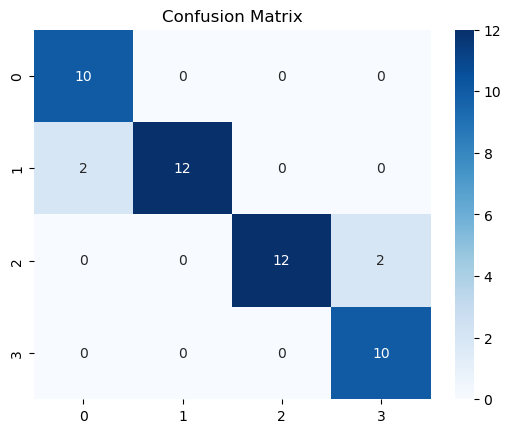

<Figure size 640x480 with 0 Axes>

In [176]:
evaluate_model(rfm, X_test, y_test)

### Decision Tree Evaluation

Accuracy: 95.83%
Precision: 96.53%
Recall: 95.83%
F1-score: 95.86%
DecisionTreeClassifier Cross-Validation Accuracy: 1.00


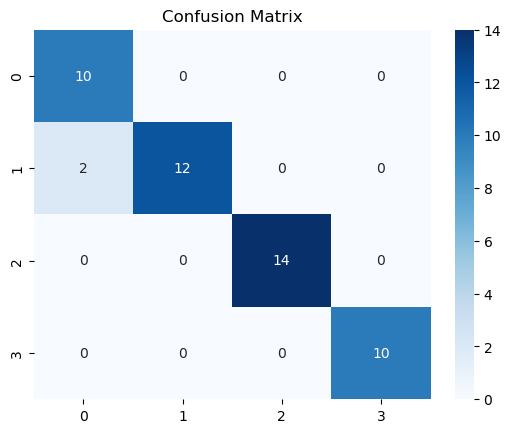

<Figure size 640x480 with 0 Axes>

In [244]:
evaluate_model(dtm, X_test, y_test, average='weighted')

## Comaprison between Models

Comparing the Accuracy, Precision, Recall & F1-score of Random Forest Model & Decision Tree Model we can see that Decision Tree has performed better in predicting the Diagnosis.